# Artificial Intelligence Spring 99 <img src = 'https://ece.ut.ac.ir/cict-theme/images/footer-logo.png' alt="Tehran-University-Logo" width="150" height="150" align="right">
## Project 1: Search
### Dr. Hakimeh Fadaei
### By Omid Vaheb

### Introduction:
In this project I implemented some of uninformed searches such as BFS and IDS and also an informed search called A*. In these implementations time complexity and space complexity were vital and important so many optimisations had to be done.

## Question:
In this project we are asked to find an optimal path for an ambulance in a 2-D city map in order to push all of the patients into hospitals. We can't push 2 patients at the same time and we can't pass #'s. We can go over hospitals and patients disapear when they reach a hospital. In order to solve this question we act same as all search problems by creating frontiers and explored lists. States in this problem are map of city so we use a class to show them. Oter features of this class are number of moves that we have taken to reach there and also if ambulance is over a hospital or not.

## Searches:
### Uninformed:
#### 1.BFS
In this search we see frontiers as queue meaning that first state in wil be first one out. BFS is complete and it will give us optimal solution with time complexity of O(b^d).
#### 2.IDS
IDS uses DFS in different depths and it is complete if cost of moves are the same. IDS will give us an optimal solution unlike DFS and its time complexity is O(bm).
### Informed:
#### A*
In this informed search we use a heuristic function to guess the cost of answer from each state in frontier to goal and choose the one with the minimum heuristic plus cost to that state. Heuristic function that we choose is so important because only admissible hueristics will result in optimal solution. This search is complete and its time complexity is O(b^d).

### Implementation:

At first we import clock in order to find run time of our program and copy for making deep copies of our states.

In [ ]:
import copy
import time

The next step is to define 4 directions that the ambulance could go using dx and dy lists. is_goal function is defined to check if there is any patient remaining in the map and will return True if there are none.find_ambulance is also a function that will return coordinates of ambulance in map and list_to_string is a function that will get map of the city i 2-D list format and will convert all of it into one string in order to hash it in the next steps.

In [ ]:
dx = [ 0, 1, 0, -1]
dy = [ 1, 0, -1, 0]
def list_to_string(l):
  result = ""
  for i in l:
    for j in i:
      result += j
  return result
def is_goal(state):
  for temp in state.cmap:
    if 'P' in temp:
      return False
  return True
def find_ambulance(state):
  for row in state.cmap:
    if 'A' in row:
      return row.index('A'),state.cmap.index(row)

Now we define our State class which has map of this city in a 2-D list of stings and depth of solution until this state and an indicator to know if ambulance is over a hospital or not. I had to rewrite deep copy for this class because the original copy.deepcopy is not an optimized function and takes a lot of time.

In [ ]:
class State(object):
  def __init__(self, _map, _moves, oh):
    self.cmap = _map
    self.moves = _moves
    self.over_hospital = oh
  def cpy(self):
    new_cmap = []
    for row in self.cmap:
      temp = []
      for i in row:
        temp.append(i)
      new_cmap.append(temp)
    return State(new_cmap, copy.deepcopy(self.moves), copy.deepcopy(self.over_hospital))

The final step is to write the function that wants to handle bfs search. This function gets a starting node and a list of frontiers and a set of explored maps. At first i used list for explored states but it was too slow so I optimized it by storing only maps but it still wasn't fast enough so my solution was to use set because its time complexity for search is O(1). The final act for optimizing explored set was to store hashed string instead of 2-D list of string. 
BFS function will work until its frontiers is empty or it sees goal state in one of the frontiers. Instead of waiting to explore goal state in frontiers I checked it when I wanted to add a state to frontiers list, for optimization. In the main while an unseen state that was added first to the frontiers will pop into exploring. Then it adds hashed string of its map to explored set. The next step is to add states that moving ambulance makes but it has to check if the state is acceptable and check if it is not in the explored set. Another optimization used was to use deep copy as minimum as possible by using the exploring as the new frontier for the last possible neighbour of exploring. The output of this function is depth of solution, total states seen and total unique states seen or -1 if it doesn't find an answer.
All these acts made my program 50x faster.

In [ ]:
def bfs(explored, frontiers, node):
  frontiers.append(node)
  total_states = 1
  total_unique_states = 1
  n = len(node.cmap)
  m = len(node.cmap[0])
  if (is_goal(node)):
    return 0, 1, 1
  while frontiers:
    exploring = frontiers.pop(0)
    ax,ay = find_ambulance(exploring)
    explored.add(hash(list_to_string(exploring.cmap)))
    sides = [0, 0, 0, 0]
    for k in range(4):
      new_ax = ax + dx[k]
      new_ay = ay + dy[k]
      if not (new_ax==0 or new_ay==0 or new_ax==(m-1) or new_ay==(n-1)) \
      and (exploring.cmap[new_ay][new_ax]==' ' or (exploring.cmap[new_ay][new_ax]=='P' \
      and not (exploring.cmap[new_ay + dy[k]][new_ax + dx[k]]=='P' or \
      exploring.cmap[new_ay + dy[k]][new_ax + dx[k]]=='#'))):
        sides[k] = 1
    sum = sides[0] + sides[1] + sides[2] + sides[3]
    for k in range(4):
      if sides[k]:
        new_ax = ax + dx[k]
        new_ay = ay + dy[k]
        total_states += 1
        if k==3 or sum==1 or (sides[3]==0 and k==2) or (sides[3]==0 and sides[2]==0 and k==1):
          neighbour = exploring
        else:
          neighbour = exploring.cpy()
        neighbour.moves += 1
        if not neighbour.over_hospital=='0':
          neighbour.cmap[ay][ax] = neighbour.over_hospital
          neighbour.over_hospital = '0'
        else:
          neighbour.cmap[ay][ax] = ' '
        if neighbour.cmap[new_ay][new_ax]==' ' :
          neighbour.cmap[new_ay][new_ax] = 'A'
        elif neighbour.cmap[new_ay][new_ax]=='P':
          if neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]]==' ':
            neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = 'P'
            neighbour.cmap[new_ay][new_ax] = 'A'
          else:
            neighbour.cmap[new_ay][new_ax] = 'A'
            if (ord(neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]])-48)==1:
              neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = ' '
            else:
              neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = chr(ord(neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]])-1)
        else:
          neighbour.oh = neighbour.cmap[new_ay][new_ax]
          neighbour.cmap[new_ay][new_ax] = ' '
        if hash(list_to_string(neighbour.cmap)) not in explored:
          total_unique_states += 1
          frontiers.append(neighbour)
        if is_goal(neighbour):
          return neighbour.moves, total_states, total_unique_states
  return -1, total_states, total_unique_states

## BFS

Now we import test cases and run the program 3 times for each one:

In [14]:
test_maps = []
test_maps.append(list(open("./test1.txt", "r").readlines()))
test_maps.append(list(open("./test2.txt", "r").readlines()))
test_maps.append(list(open("./test3.txt", "r").readlines()))

In [15]:
for j in range(3):
    test_times = []
    test_maps[j] = list(map(lambda s: s.strip(), test_maps[j]))
    for i in range(len(test_maps[j])):
          test_maps[j][i] = list(test_maps[j][i])
    for k in range(3):
        start_time = time.time()
        testing = copy.deepcopy(test_maps[j])
        frontiers = []
        explored = set()
        sol_distance, total_states, total_unique_states = bfs(explored, frontiers, State(testing, 0, '0'))
        end_time = time.time()
        test_times.append(end_time - start_time)
        print("--- %s seconds ---" % (end_time - start_time))
        if sol_distance==-1:
          print("No answer")
        else:
          print("You need", sol_distance, "moves for goal")
        print("Number of states seen:", total_states)
        print("Number of unique states seen:", total_unique_states)
    print("* * * * * * * * * *")
    print("Mean time of 3 runs for test", j+1, "is :", sum(test_times)/3)
    print("* * * * * * * * * *")

--- 0.03997230529785156 seconds ---
You need 11 moves for goal
Number of states seen: 1000
Number of unique states seen: 484
--- 0.01798844337463379 seconds ---
You need 11 moves for goal
Number of states seen: 1000
Number of unique states seen: 484
--- 0.016989946365356445 seconds ---
You need 11 moves for goal
Number of states seen: 1000
Number of unique states seen: 484
* * * * * * * * * *
Mean time of 3 runs for test 1 is : 0.024983565012613933
* * * * * * * * * *
--- 0.5286726951599121 seconds ---
You need 27 moves for goal
Number of states seen: 30857
Number of unique states seen: 12032
--- 0.5337245464324951 seconds ---
You need 27 moves for goal
Number of states seen: 30857
Number of unique states seen: 12032
--- 0.5216777324676514 seconds ---
You need 27 moves for goal
Number of states seen: 30857
Number of unique states seen: 12032
* * * * * * * * * *
Mean time of 3 runs for test 2 is : 0.5280249913533529
* * * * * * * * * *
--- 7.047888278961182 seconds ---
You need 39 moves

## IDS

The difference between IDS and BFS is that in BFS frontiers are queue but in IDS they are like a stack meaning that the last one in is the first one out. I used the optimization methods used in BFS, here and got the optimal solution but in a longer time.
We do the same step for IDS and we run it 3 times for each test case:

In [18]:
import copy
import time
dx = [ 0, 1, 0, -1]
dy = [ 1, 0, -1, 0]
def list_to_string(l):
  result = ""
  for i in l:
    for j in i:
      result += j
  return result
def is_goal(state):
  for temp in state.cmap:
    if 'P' in temp:
      return False
  return True
def find_ambulance(state):
  for row in state.cmap:
    if 'A' in row:
      return row.index('A'),state.cmap.index(row)
class State(object):
  def __init__(self, _map, _moves, oh):
    self.cmap = _map
    self.moves = _moves
    self.over_hospital = oh
  def cpy(self):
    new_cmap = []
    for row in self.cmap:
      temp = []
      for i in row:
        temp.append(i)
      new_cmap.append(temp)
    return State(new_cmap, copy.deepcopy(self.moves), copy.deepcopy(self.over_hospital))
def ids(explored, frontiers, node):
  total_states = 1
  total_unique_states = 1
  n = len(node.cmap)
  m = len(node.cmap[0])
  length = -1
  while True:
    frontiers = []
    frontiers.append(node)
    explored = set()
    length += 1
    while(frontiers):
      exploring = frontiers.pop(0)
      if exploring.moves>=length:
        continue
      ax,ay = find_ambulance(exploring)
      explored.add(hash(list_to_string(exploring.cmap) + chr(exploring.moves)))
      sides = [0, 0, 0, 0]
      for k in range(4):
        new_ax = ax + dx[k]
        new_ay = ay + dy[k]
        if not (new_ax==0 or new_ay==0 or new_ax==(m-1) or new_ay==(n-1)) \
        and (exploring.cmap[new_ay][new_ax]==' ' or (exploring.cmap[new_ay][new_ax]=='P' \
        and not (exploring.cmap[new_ay + dy[k]][new_ax + dx[k]]=='P' or \
        exploring.cmap[new_ay + dy[k]][new_ax + dx[k]]=='#'))):
          sides[k] = 1
      sum = sides[0] + sides[1] + sides[2] + sides[3]
      for k in range(4):
        if sides[k]:
          new_ax = ax + dx[k]
          new_ay = ay + dy[k]
          total_states += 1
          neighbour = exploring.cpy()
          neighbour.moves += 1
          if not neighbour.over_hospital=='0':
            neighbour.cmap[ay][ax] = neighbour.over_hospital
            neighbour.over_hospital = '0'
          else:
            neighbour.cmap[ay][ax] = ' '
          if neighbour.cmap[new_ay][new_ax]==' ' :
            neighbour.cmap[new_ay][new_ax] = 'A'
          elif neighbour.cmap[new_ay][new_ax]=='P':
            if neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]]==' ':
              neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = 'P'
              neighbour.cmap[new_ay][new_ax] = 'A'
            else:
              neighbour.cmap[new_ay][new_ax] = 'A'
              if (ord(neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]])-48)==1:
                neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = ' '
              else:
                neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = chr(ord(neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]])-1)
          else:
            neighbour.oh = neighbour.cmap[new_ay][new_ax]
            neighbour.cmap[new_ay][new_ax] = ' '
          if hash(list_to_string(neighbour.cmap) + chr(neighbour.moves)) not in explored:
            total_unique_states += 1
            frontiers.insert(0, neighbour)
          if is_goal(neighbour):
            return neighbour.moves, total_states, total_unique_states
  return -1, total_states, total_unique_states


In [19]:
test_maps = []
test_maps.append(list(open("./test1.txt", "r").readlines()))
test_maps.append(list(open("./test2.txt", "r").readlines()))
test_maps.append(list(open("./test3.txt", "r").readlines()))

In [20]:
for j in range(3):
    test_times = []
    test_maps[j] = list(map(lambda s: s.strip(), test_maps[j]))
    for i in range(len(test_maps[j])):
          test_maps[j][i] = list(test_maps[j][i])
    for k in range(3):
        start_time = time.time()
        testing = copy.deepcopy(test_maps[j])
        frontiers = []
        explored = set()
        sol_distance, total_states, total_unique_states = ids(explored, frontiers, State(testing, 0, '0'))
        end_time = time.time()
        test_times.append(end_time - start_time)
        print("--- %s seconds ---" % (end_time - start_time))
        if sol_distance==-1:
          print("No answer")
        else:
          print("You need", sol_distance, "moves for goal")
        print("Number of states seen:", total_states)
        print("Number of unique states seen:", total_unique_states)
    print("* * * * * * * * * *")
    print("Mean time of 3 runs for test", j+1, "is :", sum(test_times)/3)
    print("* * * * * * * * * *")

--- 0.13191556930541992 seconds ---
You need 11 moves for goal
Number of states seen: 5008
Number of unique states seen: 3397
--- 0.10090279579162598 seconds ---
You need 11 moves for goal
Number of states seen: 5008
Number of unique states seen: 3397
--- 0.10193514823913574 seconds ---
You need 11 moves for goal
Number of states seen: 5008
Number of unique states seen: 3397
* * * * * * * * * *
Mean time of 3 runs for test 1 is : 0.11158450444539388
* * * * * * * * * *
--- 8.480751037597656 seconds ---
You need 27 moves for goal
Number of states seen: 406033
Number of unique states seen: 214717
--- 9.430827140808105 seconds ---
You need 27 moves for goal
Number of states seen: 406033
Number of unique states seen: 214717
--- 8.922034978866577 seconds ---
You need 27 moves for goal
Number of states seen: 406033
Number of unique states seen: 214717
* * * * * * * * * *
Mean time of 3 runs for test 2 is : 8.94453771909078
* * * * * * * * * *
--- 35.14003872871399 seconds ---
You need 39 mov

## First A*

Now we implement A* using two heuristics. In A* the act of choosing the next state to explore is determined by a function named find_best_case that finds the state in frontier with the minimum heuristic plus cost to reach that state which is that states moves feature. In order to optimize the performance the heuristic function for each state is calculated only when it is being constructed. The first heuristic function I use is sum of manhattan distance of every patient to the nearest hospital. It is admissible because we need this much of moves regardless of map and place of ambulance but it isn't consistent.

In [25]:
import copy
import time
dx = [ 0, 1, 0, -1]
dy = [ 1, 0, -1, 0]
def list_to_string(l):
  result = ""
  for i in l:
    for j in i:
      result += j
  return result
def is_goal(state):
  for temp in state.cmap:
    if 'P' in temp:
      return False
  return True
def find_ambulance(cmap):
  for row in cmap:
    if 'A' in row:
      return row.index('A'),cmap.index(row)
class State(object):
  def __init__(self, _map, _moves, oh, _h):
    self.cmap = _map
    self.moves = _moves
    self.over_hospital = oh
    self.heuristic = _h
  def cpy(self):
    new_cmap = []
    for row in self.cmap:
      temp = []
      for i in row:
        temp.append(i)
      new_cmap.append(temp)
    return State(new_cmap, copy.deepcopy(self.moves), copy.deepcopy(self.over_hospital), copy.deepcopy(self.heuristic))
  def seth(self, _h):
    self.heuristic = _h
def heuristic1(cmap):
  px = []
  py = []
  hx = []
  hy = []
  index = -1
  for i in range(len(cmap)):
    for j in range(len(cmap[0])):
      if cmap[i][j]=='P':
        px.append(j)
        py.append(i)
      elif cmap[i][j] not in [' ', '#', 'A',]:
        hx.append(j)
        hy.append(i)
      elif cmap[i][j]=='A':
        ax = j
        ay = i
  min_A_to_P = 1000000
  for i in range(len(px)):
    if ((abs(px[i]-ax) + abs(py[i]-ay)))<min_A_to_P:
      min_A_to_P = (abs(px[i]-ax) + abs(py[i]-ay))
      index = i
  min_P_to_H = [1000000]*len(px)
  for p_index in range(len(px)):
    for h_index in range(len(hx)):
      if (abs(px[p_index]-hx[h_index]) + abs(py[p_index]-hy[h_index]))<min_P_to_H[p_index]:
        min_P_to_H[p_index] = (abs(px[p_index]-hx[h_index]) + abs(py[p_index]-hy[h_index]))
  return sum(min_P_to_H)
def find_best_state(frontiers):
  min_h = 1000000
  index = 0
  for i in range(len(frontiers)):
    if (frontiers[i].heuristic + frontiers[i].moves)<=min_h:
      min_h = frontiers[i].heuristic + frontiers[i].moves
      index = i
  return index
def A1(explored, frontiers, node):
  frontiers.append(node)
  total_states = 1
  total_unique_states = 1
  n = len(node.cmap)
  m = len(node.cmap[0])
  while frontiers:
    best_state = find_best_state(frontiers)
    exploring = frontiers.pop(best_state)
    ax,ay = find_ambulance(exploring.cmap)
    explored.add(hash(list_to_string(exploring.cmap)))
    sides = [0, 0, 0, 0]
    for k in range(4):
      new_ax = ax + dx[k]
      new_ay = ay + dy[k]
      if not (new_ax==0 or new_ay==0 or new_ax==(m-1) or new_ay==(n-1)) \
      and (exploring.cmap[new_ay][new_ax]==' ' or (exploring.cmap[new_ay][new_ax]=='P' \
      and not (exploring.cmap[new_ay + dy[k]][new_ax + dx[k]]=='P' or \
      exploring.cmap[new_ay + dy[k]][new_ax + dx[k]]=='#'))):
        sides[k] = 1
    sum = sides[0] + sides[1] + sides[2] + sides[3]
    for k in range(4):
      if sides[k]:
        new_ax = ax + dx[k]
        new_ay = ay + dy[k]
        total_states += 1
        if k==3 or sum==1 or (sides[3]==0 and k==2) or (sides[3]==0 and sides[2]==0 and k==1):
          neighbour = exploring
        else:
          neighbour = exploring.cpy()
        neighbour.moves += 1
        if not neighbour.over_hospital=='0':
          neighbour.cmap[ay][ax] = neighbour.over_hospital
          neighbour.over_hospital = '0'
        else:
          neighbour.cmap[ay][ax] = ' '
        if neighbour.cmap[new_ay][new_ax]==' ' :
          neighbour.cmap[new_ay][new_ax] = 'A'
        elif neighbour.cmap[new_ay][new_ax]=='P':
          if neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]]==' ':
            neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = 'P'
            neighbour.cmap[new_ay][new_ax] = 'A'
          else:
            neighbour.cmap[new_ay][new_ax] = 'A'
            if (ord(neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]])-48)==1:
              neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = ' '
            else:
              neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = chr(ord(neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]])-1)
        else:
          neighbour.oh = neighbour.cmap[new_ay][new_ax]
          neighbour.cmap[new_ay][new_ax] = ' '
        if hash(list_to_string(neighbour.cmap)) not in explored:
          total_unique_states += 1
          neighbour.seth(heuristic1(neighbour.cmap))
          frontiers.append(neighbour)
        if is_goal(neighbour):
          return neighbour.moves, total_states, total_unique_states
  return -1, total_states, total_unique_states

In [34]:
test_maps = []
test_maps.append(list(open("./test1.txt", "r").readlines()))
test_maps.append(list(open("./test2.txt", "r").readlines()))
test_maps.append(list(open("./test3.txt", "r").readlines()))

In [35]:
for j in range(3):
    test_times = []
    test_maps[j] = list(map(lambda s: s.strip(), test_maps[j]))
    for i in range(len(test_maps[j])):
          test_maps[j][i] = list(test_maps[j][i])
    for k in range(3):
        start_time = time.time()
        testing = copy.deepcopy(test_maps[j])
        frontiers = []
        explored = set()
        sol_distance, total_states, total_unique_states = A1(explored, frontiers, State(testing, 0, '0', heuristic1(test_maps[j])))
        end_time = time.time()
        test_times.append(end_time - start_time)
        print("--- %s seconds ---" % (end_time - start_time))
        if sol_distance==-1:
          print("No answer")
        else:
          print("You need", sol_distance, "moves for goal")
        print("Number of states seen:", total_states)
        print("Number of unique states seen:", total_unique_states)
    print("* * * * * * * * * *")
    print("Mean time of 3 runs for test", j+1, "is :", sum(test_times)/3)
    print("* * * * * * * * * *")

--- 0.023984909057617188 seconds ---
You need 11 moves for goal
Number of states seen: 389
Number of unique states seen: 213
--- 0.017991065979003906 seconds ---
You need 11 moves for goal
Number of states seen: 389
Number of unique states seen: 213
--- 0.013988733291625977 seconds ---
You need 11 moves for goal
Number of states seen: 389
Number of unique states seen: 213
* * * * * * * * * *
Mean time of 3 runs for test 1 is : 0.018654902776082356
* * * * * * * * * *
--- 0.9034409523010254 seconds ---
You need 27 moves for goal
Number of states seen: 11538
Number of unique states seen: 5047
--- 0.9059975147247314 seconds ---
You need 27 moves for goal
Number of states seen: 11538
Number of unique states seen: 5047
--- 0.9097859859466553 seconds ---
You need 27 moves for goal
Number of states seen: 11538
Number of unique states seen: 5047
* * * * * * * * * *
Mean time of 3 runs for test 2 is : 0.9064081509908041
* * * * * * * * * *
--- 4.936631441116333 seconds ---
You need 39 moves for

## Second A*

Now we implement A* for the second heuristic. It is number of patients remaining plus manhattan distance of ambulance to nearest patient plus sum of manhattan distances of every patient to the nearest hospital for them. It is neither admissible nor consistent.

In [39]:
def heuristic2(cmap):
  px = []
  py = []
  hx = []
  hy = []
  index = -1
  for i in range(len(cmap)):
    for j in range(len(cmap[0])):
      if cmap[i][j]=='P':
        px.append(j)
        py.append(i)
      elif cmap[i][j] not in [' ', '#', 'A',]:
        hx.append(j)
        hy.append(i)
      elif cmap[i][j]=='A':
        ax = j
        ay = i
  min_A_to_P = 1000000
  for i in range(len(px)):
    if ((abs(px[i]-ax) + abs(py[i]-ay)))<min_A_to_P:
      min_A_to_P = (abs(px[i]-ax) + abs(py[i]-ay))
      index = i
  min_P_to_H = [1000000]*len(px)
  for p_index in range(len(px)):
    for h_index in range(len(hx)):
      if (abs(px[p_index]-hx[h_index]) + abs(py[p_index]-hy[h_index]))<min_P_to_H[p_index]:
        min_P_to_H[p_index] = (abs(px[p_index]-hx[h_index]) + abs(py[p_index]-hy[h_index]))
  return sum(min_P_to_H) + len(px) + min_A_to_P
def A2(explored, frontiers, node):
  frontiers.append(node)
  total_states = 1
  total_unique_states = 1
  n = len(node.cmap)
  m = len(node.cmap[0])
  while frontiers:
    best_state = find_best_state(frontiers)
    exploring = frontiers.pop(best_state)
    ax,ay = find_ambulance(exploring.cmap)
    explored.add(hash(list_to_string(exploring.cmap)))
    sides = [0, 0, 0, 0]
    for k in range(4):
      new_ax = ax + dx[k]
      new_ay = ay + dy[k]
      if not (new_ax==0 or new_ay==0 or new_ax==(m-1) or new_ay==(n-1)) \
      and (exploring.cmap[new_ay][new_ax]==' ' or (exploring.cmap[new_ay][new_ax]=='P' \
      and not (exploring.cmap[new_ay + dy[k]][new_ax + dx[k]]=='P' or \
      exploring.cmap[new_ay + dy[k]][new_ax + dx[k]]=='#'))):
        sides[k] = 1
    sum = sides[0] + sides[1] + sides[2] + sides[3]
    for k in range(4):
      if sides[k]:
        new_ax = ax + dx[k]
        new_ay = ay + dy[k]
        total_states += 1
        if k==3 or sum==1 or (sides[3]==0 and k==2) or (sides[3]==0 and sides[2]==0 and k==1):
          neighbour = exploring
        else:
          neighbour = exploring.cpy()
        neighbour.moves += 1
        if not neighbour.over_hospital=='0':
          neighbour.cmap[ay][ax] = neighbour.over_hospital
          neighbour.over_hospital = '0'
        else:
          neighbour.cmap[ay][ax] = ' '
        if neighbour.cmap[new_ay][new_ax]==' ' :
          neighbour.cmap[new_ay][new_ax] = 'A'
        elif neighbour.cmap[new_ay][new_ax]=='P':
          if neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]]==' ':
            neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = 'P'
            neighbour.cmap[new_ay][new_ax] = 'A'
          else:
            neighbour.cmap[new_ay][new_ax] = 'A'
            if (ord(neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]])-48)==1:
              neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = ' '
            else:
              neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]] = chr(ord(neighbour.cmap[new_ay + dy[k]][new_ax + dx[k]])-1)
        else:
          neighbour.oh = neighbour.cmap[new_ay][new_ax]
          neighbour.cmap[new_ay][new_ax] = ' '
        if hash(list_to_string(neighbour.cmap)) not in explored:
          total_unique_states += 1
          neighbour.seth(heuristic2(neighbour.cmap))
          frontiers.append(neighbour)
        if is_goal(neighbour):
          return neighbour.moves, total_states, total_unique_states
  return -1, total_states, total_unique_states

In [43]:
test_maps = []
test_maps.append(list(open("./test1.txt", "r").readlines()))
test_maps.append(list(open("./test2.txt", "r").readlines()))
test_maps.append(list(open("./test3.txt", "r").readlines()))

In [44]:
for j in range(3):
    test_times = []
    test_maps[j] = list(map(lambda s: s.strip(), test_maps[j]))
    for i in range(len(test_maps[j])):
          test_maps[j][i] = list(test_maps[j][i])
    for k in range(3):
        start_time = time.time()
        testing = copy.deepcopy(test_maps[j])
        frontiers = []
        explored = set()
        sol_distance, total_states, total_unique_states = A2(explored, frontiers, State(testing, 0, '0', heuristic2(test_maps[j])))
        end_time = time.time()
        test_times.append(end_time - start_time)
        print("--- %s seconds ---" % (end_time - start_time))
        if sol_distance==-1:
          print("No answer")
        else:
          print("You need", sol_distance, "moves for goal")
        print("Number of states seen:", total_states)
        print("Number of unique states seen:", total_unique_states)
    print("* * * * * * * * * *")
    print("Mean time of 3 runs for test", j+1, "is :", sum(test_times)/3)
    print("* * * * * * * * * *")

--- 0.011993169784545898 seconds ---
You need 11 moves for goal
Number of states seen: 210
Number of unique states seen: 138
--- 0.009992837905883789 seconds ---
You need 11 moves for goal
Number of states seen: 210
Number of unique states seen: 138
--- 0.008994102478027344 seconds ---
You need 11 moves for goal
Number of states seen: 210
Number of unique states seen: 138
* * * * * * * * * *
Mean time of 3 runs for test 1 is : 0.010326703389485678
* * * * * * * * * *
--- 0.4343256950378418 seconds ---
You need 27 moves for goal
Number of states seen: 6047
Number of unique states seen: 3028
--- 0.49669837951660156 seconds ---
You need 27 moves for goal
Number of states seen: 6047
Number of unique states seen: 3028
--- 0.4288828372955322 seconds ---
You need 27 moves for goal
Number of states seen: 6047
Number of unique states seen: 3028
* * * * * * * * * *
Mean time of 3 runs for test 2 is : 0.4533023039499919
* * * * * * * * * *
--- 1.8785786628723145 seconds ---
You need 39 moves for 

### Test1:

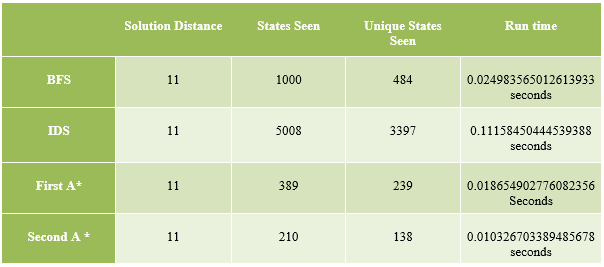

### Test2:

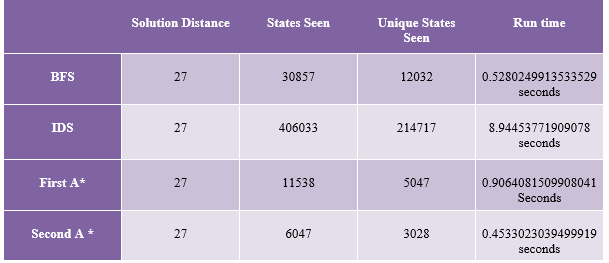

### Test3:

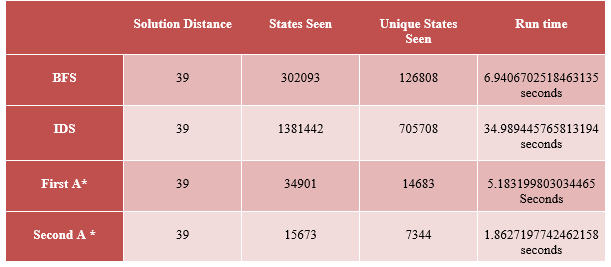

## Conclusion:

It could be seen that all of searhing methods gave us the optimal solution. IDS was the slowest in all of them then it was BFS.
The A* searches were faster than others. In choosing the heuristic for A* you have to think about the tradeoff between the time you spend to find te best state in each move and the time for finding answer. The best heuristic is the one that sum of these two times is minimum for it. First heuristic I used is admissible and will result in The optimal solution in every condition. The second one in other hand is much faster and explores half states than the other one but it is not admissible and may not give us the best solution possible.